<a href="https://colab.research.google.com/github/dharmasish/Business-case-studies/blob/main/Flip_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

## Data Import

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/flip_news/flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


# EDA

In [ ]:


print("Shape of the dataset:", df.shape)
print("News articles per category:\n", df['Category'].value_counts())


Shape of the dataset: (2225, 2)
News articles per category:
 Sports           511
Business         510
Politics         417
Technology       401
Entertainment    386
Name: Category, dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


* No null values

### Article % wise split in 5 categories

<Axes: ylabel='Category'>

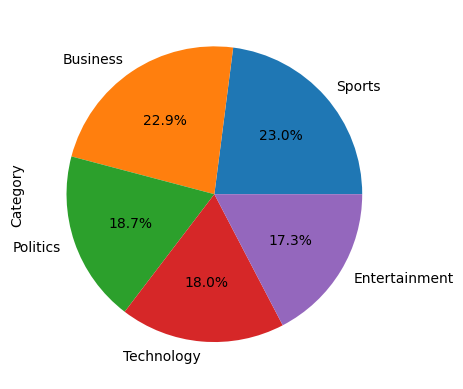

In [ ]:
df.Category.value_counts().plot(kind='pie', autopct='%1.1f%%')


<Axes: >

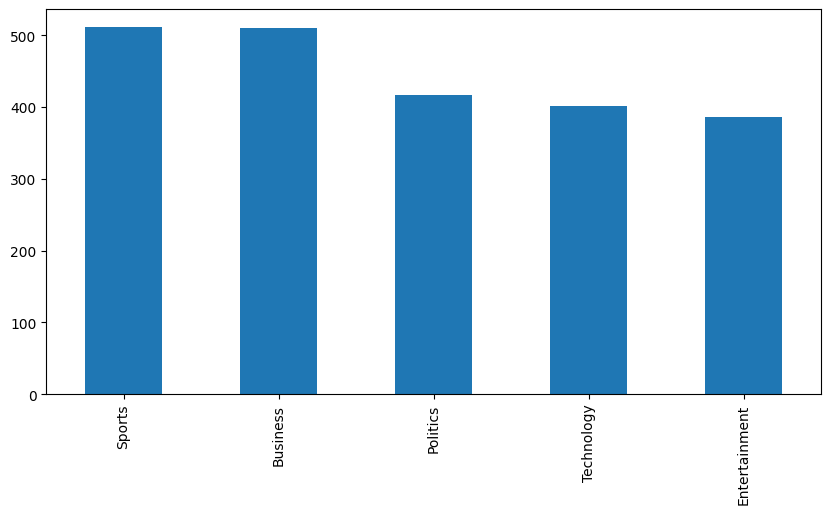

In [ ]:


df.Category.value_counts().plot(kind='bar', figsize=(10,5))


<Axes: ylabel='Frequency'>

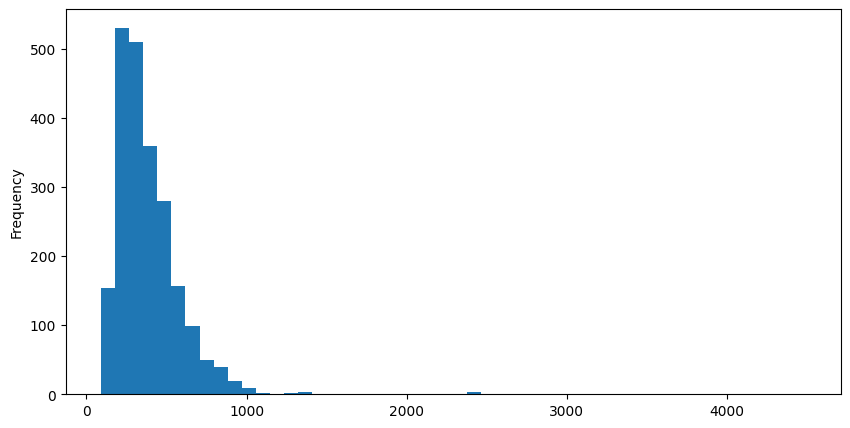

In [ ]:
df['Article'].str.split().str.len().plot(kind='hist', figsize=(10,5), bins = 50)

In [ ]:
print('max length: ' , df['Article'].str.split().str.len().max() )

print('min length: ' , df['Article'].str.split().str.len().min() )

print('mean length: ' , df['Article'].str.split().str.len().mean() )

print('median length: ' , df['Article'].str.split().str.len().median() )

max length:  4492
min length:  90
mean length:  390.2952808988764
median length:  337.0


In [ ]:
df.Article.duplicated().value_counts()


False    2126
True       99
Name: Article, dtype: int64

* dropping duplicate values

In [ ]:
df.drop_duplicates(subset=['Article'], inplace=True)
len(df)

2126

# Pre processing

In [ ]:
df.Article = df.Article.str.replace("\n","")
df.Article = df.Article.apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
df.Article = df.Article.str.lower()
df.Article = df.Article.str.strip()

In [ ]:

def process_text(text):
    # Remove non-letters
    text = re.sub("[^a-zA-Z]", " ", text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [w for w in tokens if not w in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(w) for w in tokens]

    return ' '.join(lemmatized)

# Applying the text processing function
df['processed_article'] = df['Article'].apply(process_text)

df

,Category,Article,processed_article
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...
...,...,...,...
2220,Business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell ja...
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...
2222,Entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...
2223,Politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...


In [ ]:
# Encoding the target variable
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['Category'])
df

,Category,Article,processed_article,category_encoded
0,Technology,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...,4
1,Business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...,0
2,Sports,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...,3
3,Sports,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,3
4,Entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...,1
...,...,...,...,...
2220,Business,cars pull down us retail figures us retail sal...,car pull u retail figure u retail sale fell ja...,0
2221,Politics,kilroy unveils immigration policy ex-chatshow ...,kilroy unveils immigration policy ex chatshow ...,2
2222,Entertainment,rem announce new glasgow concert us band rem h...,rem announce new glasgow concert u band rem an...,1
2223,Politics,how political squabbles snowball it s become c...,political squabble snowball become commonplace...,2


### Bag of Words

In [ ]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['processed_article'])
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
print("Bag of Words DataFrame:")

bow_df[1:10].loc[:,bow_df[1:10].sum() > 0]

Bag of Words DataFrame:


,ability,able,according,accounting,accused,across,acting,activist,admission,admitted,...,working,world,worldcom,would,yeading,year,yeovil,york,young,zeta
1,1,0,0,5,1,0,0,0,1,2,...,0,0,8,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,0,1,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,0,1,0,0,1,1,1,1,0,0,...,1,0,0,2,0,3,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,2,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,3,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,1,0,0,1,0


In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(bow_df, df['category_encoded'], test_size=0.3, random_state=42)

# 5. Model Training & Evaluation
# Define a function to train and evaluate a model
def train_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Classification Report:\n", classification_report(y_test, predictions))

# Naive Bayes
print('Naive Bayes')
nb_model = MultinomialNB()
train_eval_model(nb_model, X_train, X_test, y_train, y_test)

# Decision Tree
print('Decision Tree')
dt_model = DecisionTreeClassifier()
train_eval_model(dt_model, X_train, X_test, y_train, y_test)

# Nearest Neighbors
print('Nearest Neighbors')
knn_model = KNeighborsClassifier()
train_eval_model(knn_model, X_train, X_test, y_train, y_test)

# Random Forest
print('Random Forest')
rf_model = RandomForestClassifier()
train_eval_model(rf_model, X_train, X_test, y_train, y_test)


Naive Bayes
Accuracy: 0.9827586206896551
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98       151
           1       0.98      0.99      0.98        98
           2       0.98      1.00      0.99       118
           3       1.00      1.00      1.00       159
           4       0.95      0.96      0.96       112

    accuracy                           0.98       638
   macro avg       0.98      0.98      0.98       638
weighted avg       0.98      0.98      0.98       638

Decision Tree
Accuracy: 0.8213166144200627
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       151
           1       0.68      0.90      0.77        98
           2       0.82      0.80      0.81       118
           3       0.95      0.89      0.92       159
           4       0.79      0.74      0.76       112

    accuracy                           0.82       638

# TF-IDF

In [ ]:
# TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_article'])
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF DataFrame:")
tfidf_df[1:10].loc[:,tfidf_df[1:10].sum() > 0]

TF-IDF DataFrame:


,ability,able,according,accounting,accused,across,acting,activist,admission,admitted,...,working,world,worldcom,would,yeading,year,yeovil,york,young,zeta
1,0.039331,0.000000,0.000000,0.255998,0.036248,0.000000,0.000000,0.000000,0.054171,0.073901,...,0.000000,0.000000,0.446394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.053829,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.052173,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.281847,0.000000,0.066877,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.035351,0.000000,0.000000,0.041303,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046615,0.000000,0.087718
5,0.000000,0.026087,0.000000,0.000000,0.031246,0.027978,0.039475,0.042697,0.000000,0.000000,...,0.027074,0.000000,0.000000,0.027117,0.000000,0.034763,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.050975,0.000000,0.043565,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.042041,0.000000,0.000000,0.000000,0.081944,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.094034,0.000000,0.020091,0.000000,0.000000,0.052187,0.000000


In [ ]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['category_encoded'], test_size=0.3, random_state=42)


def train_eval_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Classification Report:\n", classification_report(y_test, predictions))

# Naive Bayes
print('Naive Bayes')
nb_model = MultinomialNB()
train_eval_model(nb_model, X_train, X_test, y_train, y_test)

# Decision Tree
print('Decision Tree')
dt_model = DecisionTreeClassifier()
train_eval_model(dt_model, X_train, X_test, y_train, y_test)

# Nearest Neighbors
print('Nearest Neighbors')
knn_model = KNeighborsClassifier()
train_eval_model(knn_model, X_train, X_test, y_train, y_test)

# Random Forest
print('Random Forest')
rf_model = RandomForestClassifier()
train_eval_model(rf_model, X_train, X_test, y_train, y_test)


Naive Bayes
Accuracy: 0.9717868338557993
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       151
           1       0.98      0.97      0.97        98
           2       0.95      0.96      0.95       118
           3       0.99      1.00      0.99       159
           4       0.99      0.93      0.96       112

    accuracy                           0.97       638
   macro avg       0.97      0.97      0.97       638
weighted avg       0.97      0.97      0.97       638

Decision Tree
Accuracy: 0.8087774294670846
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.77       151
           1       0.78      0.83      0.80        98
           2       0.78      0.79      0.78       118
           3       0.90      0.94      0.92       159
           4       0.75      0.71      0.73       112

    accuracy                           0.81       638